In [1]:
import torch
import torch.nn as nn
import numpy as np
import matplotlib.pyplot as plt
import scipy.io
# Define the coRNNCell
class coRNNCell(nn.Module):
    def __init__(self, n_inp, n_hid, dt, gamma, epsilon):
        super(coRNNCell, self).__init__()
        self.dt = dt
        self.gamma = gamma
        self.epsilon = epsilon
        self.i2h = nn.Linear(n_inp + n_hid + n_hid, n_hid)

    def forward(self, x, hy, hz):
        hz = hz + self.dt * (torch.tanh(self.i2h(torch.cat((x, hz, hy), 1)))
                             - self.gamma * hy - self.epsilon * hz)
        hy = hy + self.dt * hz

        return hy, hz

# Define the coRNN model
class coRNN(nn.Module):
    def __init__(self, n_inp, n_hid, n_out, dt, gamma, epsilon):
        super(coRNN, self).__init__()
        self.n_hid = n_hid
        self.cell = coRNNCell(n_inp, n_hid, dt, gamma, epsilon)
        self.readout = nn.Linear(n_hid, n_out)

    def forward(self, x):
        hy = torch.zeros(x.size(1), self.n_hid)
        hz = torch.zeros(x.size(1), self.n_hid)

        for t in range(x.size(0)):
            hy, hz = self.cell(x[t], hy, hz)
        output = self.readout(hy)

        return output


(1, 256)
(1, 100)
(256, 100)


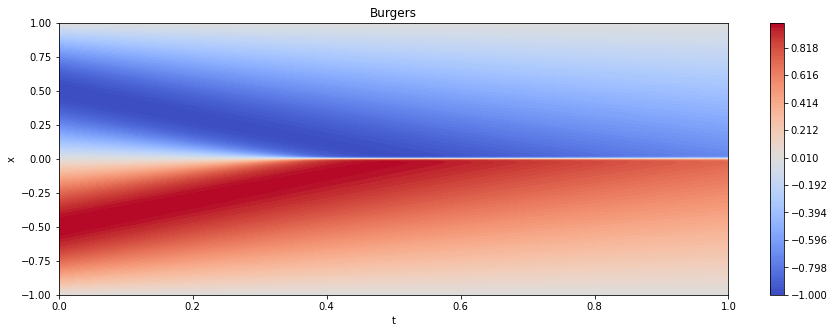

In [2]:
# Load the .mat file
mat_data = scipy.io.loadmat('burg.mat')

# Access the variables stored in the .mat file
# The variable names in the .mat file become keys in the loaded dictionary
x = mat_data['x']
t = mat_data['t']
u = mat_data['u1']

# Use the loaded variables as needed
print(x.shape)
print(t.shape)
print(u.shape)

X, T = np.meshgrid(x, t)
# Define custom color levels
c_levels = np.linspace(np.min(u), np.max(u), 100)

# Plot the contour
plt.figure(figsize=(15, 5))
plt.contourf(T, X, u.T, levels=c_levels, cmap='coolwarm')
plt.xlabel('t')
plt.ylabel('x')
plt.title('Burgers')
plt.colorbar()  # Add a colorbar for the contour levels
plt.show()

/data/localhome/tkapoor/.local/lib/python3.8/site-packages/torch/nn/modules/loss.py:520: UserWarning: Using a target size (torch.Size([1, 79, 256])) that is different to the input size (torch.Size([79, 256])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 10/20000, Loss: 0.41685393
Epoch: 20/20000, Loss: 0.40157637
Epoch: 30/20000, Loss: 0.38687059
Epoch: 40/20000, Loss: 0.37270209
Epoch: 50/20000, Loss: 0.35906750
Epoch: 60/20000, Loss: 0.34595200
Epoch: 70/20000, Loss: 0.33333120
Epoch: 80/20000, Loss: 0.32117948
Epoch: 90/20000, Loss: 0.30947345
Epoch: 100/20000, Loss: 0.29819226
Epoch: 110/20000, Loss: 0.28731743
Epoch: 120/20000, Loss: 0.27683240
Epoch: 130/20000, Loss: 0.26672217
Epoch: 140/20000, Loss: 0.25697288
Epoch: 150/20000, Loss: 0.24757172
Epoch: 160/20000, Loss: 0.23850667
Epoch: 170/20000, Loss: 0.22976637
Epoch: 180/20000, Loss: 0.22133999
Epoch: 190/20000, Loss: 0.21321721
Epoch: 200/20000, Loss: 0.20538823
Epoch: 210/20000, Loss: 0.19784352
Epoch: 220/20000, Loss: 0.19057399
Epoch: 230/20000, Loss: 0.18357085
Epoch: 240/20000, Loss: 0.17682560
Epoch: 250/20000, Loss: 0.17033006
Epoch: 260/20000, Loss: 0.16407622
Epoch: 270/20000, Loss: 0.15805647
Epoch: 280/20000, Loss: 0.15226330
Epoch: 290/20000, Loss: 0.146

Epoch: 2330/20000, Loss: 0.01132639
Epoch: 2340/20000, Loss: 0.01124177
Epoch: 2350/20000, Loss: 0.01115786
Epoch: 2360/20000, Loss: 0.01107466
Epoch: 2370/20000, Loss: 0.01099216
Epoch: 2380/20000, Loss: 0.01091034
Epoch: 2390/20000, Loss: 0.01082921
Epoch: 2400/20000, Loss: 0.01074875
Epoch: 2410/20000, Loss: 0.01066897
Epoch: 2420/20000, Loss: 0.01058984
Epoch: 2430/20000, Loss: 0.01051136
Epoch: 2440/20000, Loss: 0.01043352
Epoch: 2450/20000, Loss: 0.01035631
Epoch: 2460/20000, Loss: 0.01027969
Epoch: 2470/20000, Loss: 0.01020364
Epoch: 2480/20000, Loss: 0.01012791
Epoch: 2490/20000, Loss: 0.01002155
Epoch: 2500/20000, Loss: 0.00980889
Epoch: 2510/20000, Loss: 0.00969999
Epoch: 2520/20000, Loss: 0.00960709
Epoch: 2530/20000, Loss: 0.00951768
Epoch: 2540/20000, Loss: 0.00935060
Epoch: 2550/20000, Loss: 0.00918079
Epoch: 2560/20000, Loss: 0.00906890
Epoch: 2570/20000, Loss: 0.00896663
Epoch: 2580/20000, Loss: 0.00886819
Epoch: 2590/20000, Loss: 0.00877194
Epoch: 2600/20000, Loss: 0.0

Epoch: 4760/20000, Loss: 0.00059160
Epoch: 4770/20000, Loss: 0.00058667
Epoch: 4780/20000, Loss: 0.00058178
Epoch: 4790/20000, Loss: 0.00057693
Epoch: 4800/20000, Loss: 0.00057212
Epoch: 4810/20000, Loss: 0.00056735
Epoch: 4820/20000, Loss: 0.00056262
Epoch: 4830/20000, Loss: 0.00055793
Epoch: 4840/20000, Loss: 0.00055327
Epoch: 4850/20000, Loss: 0.00054866
Epoch: 4860/20000, Loss: 0.00054408
Epoch: 4870/20000, Loss: 0.00053954
Epoch: 4880/20000, Loss: 0.00053504
Epoch: 4890/20000, Loss: 0.00053057
Epoch: 4900/20000, Loss: 0.00052614
Epoch: 4910/20000, Loss: 0.00052175
Epoch: 4920/20000, Loss: 0.00051739
Epoch: 4930/20000, Loss: 0.00051306
Epoch: 4940/20000, Loss: 0.00050877
Epoch: 4950/20000, Loss: 0.00050452
Epoch: 4960/20000, Loss: 0.00050030
Epoch: 4970/20000, Loss: 0.00049611
Epoch: 4980/20000, Loss: 0.00049195
Epoch: 4990/20000, Loss: 0.00048783
Epoch: 5000/20000, Loss: 0.00048374
Epoch: 5010/20000, Loss: 0.00047968
Epoch: 5020/20000, Loss: 0.00047565
Epoch: 5030/20000, Loss: 0.0

Epoch: 7120/20000, Loss: 0.00006728
Epoch: 7130/20000, Loss: 0.00006661
Epoch: 7140/20000, Loss: 0.00006594
Epoch: 7150/20000, Loss: 0.00006529
Epoch: 7160/20000, Loss: 0.00006464
Epoch: 7170/20000, Loss: 0.00006400
Epoch: 7180/20000, Loss: 0.00006336
Epoch: 7190/20000, Loss: 0.00006273
Epoch: 7200/20000, Loss: 0.00006211
Epoch: 7210/20000, Loss: 0.00006149
Epoch: 7220/20000, Loss: 0.00006088
Epoch: 7230/20000, Loss: 0.00006027
Epoch: 7240/20000, Loss: 0.00005967
Epoch: 7250/20000, Loss: 0.00005908
Epoch: 7260/20000, Loss: 0.00005849
Epoch: 7270/20000, Loss: 0.00005792
Epoch: 7280/20000, Loss: 0.00005734
Epoch: 7290/20000, Loss: 0.00005678
Epoch: 7300/20000, Loss: 0.00005620
Epoch: 7310/20000, Loss: 0.00005564
Epoch: 7320/20000, Loss: 0.00005509
Epoch: 7330/20000, Loss: 0.00005454
Epoch: 7340/20000, Loss: 0.00005400
Epoch: 7350/20000, Loss: 0.00005346
Epoch: 7360/20000, Loss: 0.00005293
Epoch: 7370/20000, Loss: 0.00005240
Epoch: 7380/20000, Loss: 0.00005188
Epoch: 7390/20000, Loss: 0.0

Epoch: 9690/20000, Loss: 0.00000491
Epoch: 9700/20000, Loss: 0.00000486
Epoch: 9710/20000, Loss: 0.00000482
Epoch: 9720/20000, Loss: 0.00000479
Epoch: 9730/20000, Loss: 0.00000472
Epoch: 9740/20000, Loss: 0.00000467
Epoch: 9750/20000, Loss: 0.00000463
Epoch: 9760/20000, Loss: 0.00000458
Epoch: 9770/20000, Loss: 0.00000453
Epoch: 9780/20000, Loss: 0.00000449
Epoch: 9790/20000, Loss: 0.00000444
Epoch: 9800/20000, Loss: 0.00000440
Epoch: 9810/20000, Loss: 0.00000436
Epoch: 9820/20000, Loss: 0.00000431
Epoch: 9830/20000, Loss: 0.00000427
Epoch: 9840/20000, Loss: 0.00000423
Epoch: 9850/20000, Loss: 0.00000419
Epoch: 9860/20000, Loss: 0.00000419
Epoch: 9870/20000, Loss: 0.00000412
Epoch: 9880/20000, Loss: 0.00000407
Epoch: 9890/20000, Loss: 0.00000403
Epoch: 9900/20000, Loss: 0.00000398
Epoch: 9910/20000, Loss: 0.00000394
Epoch: 9920/20000, Loss: 0.00000391
Epoch: 9930/20000, Loss: 0.00000387
Epoch: 9940/20000, Loss: 0.00000384
Epoch: 9950/20000, Loss: 0.00000380
Epoch: 9960/20000, Loss: 0.0

Epoch: 12130/20000, Loss: 0.00000059
Epoch: 12140/20000, Loss: 0.00000058
Epoch: 12150/20000, Loss: 0.00000058
Epoch: 12160/20000, Loss: 0.00000057
Epoch: 12170/20000, Loss: 0.00000057
Epoch: 12180/20000, Loss: 0.00000058
Epoch: 12190/20000, Loss: 0.00000057
Epoch: 12200/20000, Loss: 0.00000056
Epoch: 12210/20000, Loss: 0.00000055
Epoch: 12220/20000, Loss: 0.00000055
Epoch: 12230/20000, Loss: 0.00000054
Epoch: 12240/20000, Loss: 0.00000056
Epoch: 12250/20000, Loss: 0.00000054
Epoch: 12260/20000, Loss: 0.00000054
Epoch: 12270/20000, Loss: 0.00000053
Epoch: 12280/20000, Loss: 0.00000053
Epoch: 12290/20000, Loss: 0.00000053
Epoch: 12300/20000, Loss: 0.00000059
Epoch: 12310/20000, Loss: 0.00000054
Epoch: 12320/20000, Loss: 0.00000052
Epoch: 12330/20000, Loss: 0.00000051
Epoch: 12340/20000, Loss: 0.00000050
Epoch: 12350/20000, Loss: 0.00000050
Epoch: 12360/20000, Loss: 0.00000050
Epoch: 12370/20000, Loss: 0.00000049
Epoch: 12380/20000, Loss: 0.00000049
Epoch: 12390/20000, Loss: 0.00000049
E

Epoch: 14640/20000, Loss: 0.00000013
Epoch: 14650/20000, Loss: 0.00000013
Epoch: 14660/20000, Loss: 0.00000013
Epoch: 14670/20000, Loss: 0.00000013
Epoch: 14680/20000, Loss: 0.00000015
Epoch: 14690/20000, Loss: 0.00000015
Epoch: 14700/20000, Loss: 0.00000013
Epoch: 14710/20000, Loss: 0.00000013
Epoch: 14720/20000, Loss: 0.00000013
Epoch: 14730/20000, Loss: 0.00000013
Epoch: 14740/20000, Loss: 0.00000013
Epoch: 14750/20000, Loss: 0.00000015
Epoch: 14760/20000, Loss: 0.00000012
Epoch: 14770/20000, Loss: 0.00000013
Epoch: 14780/20000, Loss: 0.00000012
Epoch: 14790/20000, Loss: 0.00000012
Epoch: 14800/20000, Loss: 0.00000012
Epoch: 14810/20000, Loss: 0.00000014
Epoch: 14820/20000, Loss: 0.00000020
Epoch: 14830/20000, Loss: 0.00000014
Epoch: 14840/20000, Loss: 0.00000012
Epoch: 14850/20000, Loss: 0.00000012
Epoch: 14860/20000, Loss: 0.00000012
Epoch: 14870/20000, Loss: 0.00000012
Epoch: 14880/20000, Loss: 0.00000012
Epoch: 14890/20000, Loss: 0.00000012
Epoch: 14900/20000, Loss: 0.00000017
E

Epoch: 17230/20000, Loss: 0.00000007
Epoch: 17240/20000, Loss: 0.00000010
Epoch: 17250/20000, Loss: 0.00000006
Epoch: 17260/20000, Loss: 0.00000005
Epoch: 17270/20000, Loss: 0.00000005
Epoch: 17280/20000, Loss: 0.00000005
Epoch: 17290/20000, Loss: 0.00000005
Epoch: 17300/20000, Loss: 0.00000005
Epoch: 17310/20000, Loss: 0.00000005
Epoch: 17320/20000, Loss: 0.00000005
Epoch: 17330/20000, Loss: 0.00000005
Epoch: 17340/20000, Loss: 0.00000005
Epoch: 17350/20000, Loss: 0.00000005
Epoch: 17360/20000, Loss: 0.00000005
Epoch: 17370/20000, Loss: 0.00000007
Epoch: 17380/20000, Loss: 0.00000009
Epoch: 17390/20000, Loss: 0.00000012
Epoch: 17400/20000, Loss: 0.00000007
Epoch: 17410/20000, Loss: 0.00000006
Epoch: 17420/20000, Loss: 0.00000005
Epoch: 17430/20000, Loss: 0.00000005
Epoch: 17440/20000, Loss: 0.00000005
Epoch: 17450/20000, Loss: 0.00000005
Epoch: 17460/20000, Loss: 0.00000005
Epoch: 17470/20000, Loss: 0.00000005
Epoch: 17480/20000, Loss: 0.00000005
Epoch: 17490/20000, Loss: 0.00000005
E

Epoch: 19680/20000, Loss: 0.00000004
Epoch: 19690/20000, Loss: 0.00000003
Epoch: 19700/20000, Loss: 0.00000003
Epoch: 19710/20000, Loss: 0.00000003
Epoch: 19720/20000, Loss: 0.00000004
Epoch: 19730/20000, Loss: 0.00000011
Epoch: 19740/20000, Loss: 0.00000005
Epoch: 19750/20000, Loss: 0.00000004
Epoch: 19760/20000, Loss: 0.00000004
Epoch: 19770/20000, Loss: 0.00000003
Epoch: 19780/20000, Loss: 0.00000003
Epoch: 19790/20000, Loss: 0.00000003
Epoch: 19800/20000, Loss: 0.00000003
Epoch: 19810/20000, Loss: 0.00000006
Epoch: 19820/20000, Loss: 0.00000006
Epoch: 19830/20000, Loss: 0.00000003
Epoch: 19840/20000, Loss: 0.00000004
Epoch: 19850/20000, Loss: 0.00000003
Epoch: 19860/20000, Loss: 0.00000003
Epoch: 19870/20000, Loss: 0.00000004
Epoch: 19880/20000, Loss: 0.00000010
Epoch: 19890/20000, Loss: 0.00000005
Epoch: 19900/20000, Loss: 0.00000004
Epoch: 19910/20000, Loss: 0.00000003
Epoch: 19920/20000, Loss: 0.00000003
Epoch: 19930/20000, Loss: 0.00000003
Epoch: 19940/20000, Loss: 0.00000003
E

ValueError: x and y must have same first dimension, but have shapes (1, 256) and (256, 1)

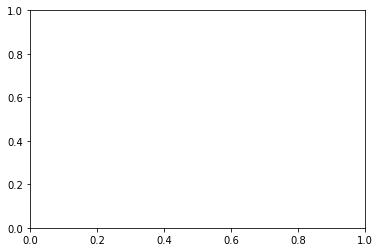

In [3]:
# Toy problem data
input_size = 256
hidden_size = 32
output_size = 256
sequence_length = 79
batch_size = 1
num_epochs = 20000


# Set random seed for reproducibility
torch.manual_seed(42)



input_data = u[:,0:79]
target_data = u[:,1:80]

test_data = u[:,79:99]
test_target = u[:,80:100]


# Convert data to tensors
input_tensor = torch.tensor(input_data.T).view(batch_size, sequence_length, input_size).float()
target_tensor = torch.tensor(target_data.T).view(batch_size, sequence_length, output_size).float()

# Convert test data to tensors
test_tensor = torch.tensor(test_data.T).view(batch_size, 20, input_size).float()
test_target_tensor = torch.tensor(test_target.T).view(batch_size, 20, output_size).float()

# Create coRNN instance
cornn = coRNN(input_size, hidden_size, output_size, dt=0.1, gamma=1.0, epsilon=0.01)

# Loss and optimizer
criterion = nn.MSELoss()
optimizer = torch.optim.Adam(cornn.parameters(), lr=0.001)

# Training loop
for epoch in range(num_epochs):
    # Forward pass
    output = cornn(input_tensor)
    loss = criterion(output, target_tensor)

    # Backward and optimize
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    # Print progress
    if (epoch+1) % 10 == 0:
        print(f'Epoch: {epoch+1}/{num_epochs}, Loss: {loss.item():.8f}')


with torch.no_grad():
    prediction = cornn(test_tensor)

print(prediction.shape)

final_time_output = prediction[-1, :]
print(final_time_output.shape)

final_out = final_time_output.detach().numpy().reshape(-1,1)
final_true = u[:,-1].reshape(-1,1)



(1, 256)
(256, 1)
(256, 1)


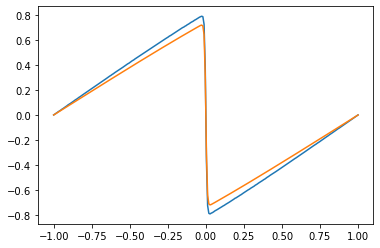

In [5]:
print(x.shape)
print(final_out.shape)
print(final_true.shape)
plt.plot(x.T, final_out)
plt.plot(x.T, final_true)
plt.show()

In [10]:
# Convert NumPy arrays to PyTorch tensors
final_out_tensor = torch.from_numpy(final_out)
final_true_tensor = torch.from_numpy(final_true)

# Compute the relative L2 error norm (generalization error)
relative_error_test = torch.mean((final_out_tensor - final_true_tensor)**2)/ torch.mean(final_true_tensor**2)

print("Relative Error Test: ", relative_error_test.item(), "%")

Relative Error Test:  0.010620635887852028 %
